In [1]:
import pandas as pd

In [2]:
df = pd.read_pickle('Apk.csv')
df.head()

,Class,Permission,apk
0,Adware,"[android.permission.ACCESS_FINE_LOCATION, andr...",00325582d7caaf0f36ad333869df444a1aa39326e60745...
1,Adware,[com.android.launcher.permission.INSTALL_SHORT...,00567501fe3517b1bf6b363dd6c4d0972a77c591b0d7c2...
2,Adware,"[android.permission.READ_CONTACTS, android.per...",00621e015191863041e78726b863b7e1374b17fda69036...
3,Adware,[com.android.launcher.permission.INSTALL_SHORT...,0149b02468a8e582d76a7ad5094c15a4a07f4f08361ba5...
4,Adware,"[android.permission.ACCESS_FINE_LOCATION, andr...",018096f1e732c91fb315a84ab5d851430c5d2c124a7f8d...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Class       2278 non-null   object
 1   Permission  2278 non-null   object
 2   apk         2278 non-null   object
dtypes: object(3)
memory usage: 53.5+ KB


In [4]:
df.isnull().sum()

Class         0
Permission    0
apk           0
dtype: int64

In [5]:
df['Class'].value_counts()

Banking    608
SMS        607
benign     565
Adware     498
Name: Class, dtype: int64

In [6]:
df['apk'].count()

2278

# 展開Permission

In [7]:
df['Permission'][0]

['android.permission.ACCESS_FINE_LOCATION',
 'android.permission.SYSTEM_ALERT_WINDOW',
 'android.permission.GET_TASKS',
 'android.permission.RESTART_PACKAGES',
 'android.permission.VIBRATE',
 'android.permission.ACCESS_WIFI_STATE',
 'android.permission.ACCESS_COARSE_LOCATION',
 'android.permission.ACCESS_NETWORK_STATE',
 'android.permission.READ_PHONE_STATE',
 'android.permission.WRITE_EXTERNAL_STORAGE',
 'android.permission.INTERNET',
 'android.permission.WAKE_LOCK']

In [8]:
df['Permission'][1]

['com.android.launcher.permission.INSTALL_SHORTCUT',
 'android.permission.SYSTEM_ALERT_WINDOW',
 'android.permission.ACCESS_FINE_LOCATION',
 'android.permission.GET_TASKS',
 'android.permission.RESTART_PACKAGES',
 'android.permission.INSTALL_PACKAGES',
 'android.permission.ACCESS_WIFI_STATE',
 'com.android.launcher.permission.UNINSTALL_SHORTCUT',
 'android.permission.ACCESS_COARSE_LOCATION',
 'android.permission.MOUNT_UNMOUNT_FILESYSTEMS',
 'android.permission.READ_SMS',
 'android.permission.ACCESS_NETWORK_STATE',
 'android.permission.READ_PHONE_STATE',
 'android.permission.WRITE_EXTERNAL_STORAGE',
 'android.permission.READ_LOGS',
 'android.permission.INTERNET']

In [9]:
df_ = df.explode('Permission')
df_['Permission'].drop_duplicates(inplace=True)
df_.head()

,Class,Permission,apk
0,Adware,android.permission.ACCESS_FINE_LOCATION,00325582d7caaf0f36ad333869df444a1aa39326e60745...
0,Adware,android.permission.SYSTEM_ALERT_WINDOW,00325582d7caaf0f36ad333869df444a1aa39326e60745...
0,Adware,android.permission.GET_TASKS,00325582d7caaf0f36ad333869df444a1aa39326e60745...
0,Adware,android.permission.RESTART_PACKAGES,00325582d7caaf0f36ad333869df444a1aa39326e60745...
0,Adware,android.permission.VIBRATE,00325582d7caaf0f36ad333869df444a1aa39326e60745...


In [10]:
df_['count'] = 1
new_df = df_.pivot_table(index=['apk', 'Class'], columns=['Permission'], values='count')

In [11]:
new_df = new_df.sort_index(axis=1, level=1)
new_df = new_df.reset_index()

In [12]:
new_df

Permission,apk,Class,ANDROID.PERMISSION.ACCESS_COARSE_LOCATION,ANDROID.PERMISSION.ACCESS_FINE_LOCATION,ANDROID.PERMISSION.VIBRATE,adnroid.permission.ACCESS_CHECKIN_PROPERTTES,ae.gov.mol.permission.C2D_MESSAGE,air.br.com.megajogos.mobile.permission.C2D_MESSAGE,air.com.eastsidegamestudio.PFGrassRoots.permission.C2D_MESSAGE,air.com.launchday.mobile.rocketleague.permission.C2D_MESSAGE,...,tv.cinetrailer.mobile.b.permission.C2D_MESSAGE,uk.co.avoir.accord.permission.C2D_MESSAGE,uk.co.wikiapps.standalone.OFFLINE_SUGGESTION,update.whatsapp.actualizar.whatsapp.news.permission.C2D_MESSAGE,us.zoom.videomeetings.permission.C2D_MESSAGE,us.zoom.videomeetings.permission.KUBI_MESSAGE,va.news.thepopeapp.permission.C2D_MESSAGE,vivino.web.app.permission.C2D_MESSAGE,vivino.web.app.permission.MAPS_RECEIVE,vivino.web.app.permission.RECEIVE_ADM_MESSAGE
0,00325582d7caaf0f36ad333869df444a1aa39326e60745...,Adware,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00567501fe3517b1bf6b363dd6c4d0972a77c591b0d7c2...,Adware,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00621e015191863041e78726b863b7e1374b17fda69036...,Adware,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0149b02468a8e582d76a7ad5094c15a4a07f4f08361ba5...,Adware,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,018096f1e732c91fb315a84ab5d851430c5d2c124a7f8d...,Adware,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2269,ffeb97d2f85d1e30f10562c003e695f323a10f905f87c0...,benign,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2270,ffecc366e301184bb458e1375d99cd58b6d918d857a108...,benign,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2271,ffecd2343d0d4fe17071180b355e7d30744f74915ede4f...,benign,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2272,fff4c39a07f20e062231781a0d7f2e039f59286d3f5d8d...,SMS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
new_df.fillna(0, inplace=True)

In [14]:
new_df.head()

Permission,apk,Class,ANDROID.PERMISSION.ACCESS_COARSE_LOCATION,ANDROID.PERMISSION.ACCESS_FINE_LOCATION,ANDROID.PERMISSION.VIBRATE,adnroid.permission.ACCESS_CHECKIN_PROPERTTES,ae.gov.mol.permission.C2D_MESSAGE,air.br.com.megajogos.mobile.permission.C2D_MESSAGE,air.com.eastsidegamestudio.PFGrassRoots.permission.C2D_MESSAGE,air.com.launchday.mobile.rocketleague.permission.C2D_MESSAGE,...,tv.cinetrailer.mobile.b.permission.C2D_MESSAGE,uk.co.avoir.accord.permission.C2D_MESSAGE,uk.co.wikiapps.standalone.OFFLINE_SUGGESTION,update.whatsapp.actualizar.whatsapp.news.permission.C2D_MESSAGE,us.zoom.videomeetings.permission.C2D_MESSAGE,us.zoom.videomeetings.permission.KUBI_MESSAGE,va.news.thepopeapp.permission.C2D_MESSAGE,vivino.web.app.permission.C2D_MESSAGE,vivino.web.app.permission.MAPS_RECEIVE,vivino.web.app.permission.RECEIVE_ADM_MESSAGE
0,00325582d7caaf0f36ad333869df444a1aa39326e60745...,Adware,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00567501fe3517b1bf6b363dd6c4d0972a77c591b0d7c2...,Adware,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00621e015191863041e78726b863b7e1374b17fda69036...,Adware,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0149b02468a8e582d76a7ad5094c15a4a07f4f08361ba5...,Adware,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,018096f1e732c91fb315a84ab5d851430c5d2c124a7f8d...,Adware,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
img_df = new_df
img_df.head()

Permission,apk,Class,ANDROID.PERMISSION.ACCESS_COARSE_LOCATION,ANDROID.PERMISSION.ACCESS_FINE_LOCATION,ANDROID.PERMISSION.VIBRATE,adnroid.permission.ACCESS_CHECKIN_PROPERTTES,ae.gov.mol.permission.C2D_MESSAGE,air.br.com.megajogos.mobile.permission.C2D_MESSAGE,air.com.eastsidegamestudio.PFGrassRoots.permission.C2D_MESSAGE,air.com.launchday.mobile.rocketleague.permission.C2D_MESSAGE,...,tv.cinetrailer.mobile.b.permission.C2D_MESSAGE,uk.co.avoir.accord.permission.C2D_MESSAGE,uk.co.wikiapps.standalone.OFFLINE_SUGGESTION,update.whatsapp.actualizar.whatsapp.news.permission.C2D_MESSAGE,us.zoom.videomeetings.permission.C2D_MESSAGE,us.zoom.videomeetings.permission.KUBI_MESSAGE,va.news.thepopeapp.permission.C2D_MESSAGE,vivino.web.app.permission.C2D_MESSAGE,vivino.web.app.permission.MAPS_RECEIVE,vivino.web.app.permission.RECEIVE_ADM_MESSAGE
0,00325582d7caaf0f36ad333869df444a1aa39326e60745...,Adware,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00567501fe3517b1bf6b363dd6c4d0972a77c591b0d7c2...,Adware,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00621e015191863041e78726b863b7e1374b17fda69036...,Adware,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0149b02468a8e582d76a7ad5094c15a4a07f4f08361ba5...,Adware,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,018096f1e732c91fb315a84ab5d851430c5d2c124a7f8d...,Adware,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Permission出現的次數平均

In [16]:
new_df['android.permission.SYSTEM_ALERT_WINDOW'].sum()

554.0

In [17]:
from statistics import mean

In [18]:
permission_cols = new_df.columns.tolist()[2:]
print(len(permission_cols))
permission_count_history = []
for col in permission_cols:
    permission_count_history.append(new_df[col].sum())
len(permission_count_history)

878


878

In [19]:
mean(permission_count_history)

32.73234624145786

# 查看permission

## 每個類別都有出現的permission

In [20]:
class_df = new_df.groupby('Class').sum()
class_df

Permission,ANDROID.PERMISSION.ACCESS_COARSE_LOCATION,ANDROID.PERMISSION.ACCESS_FINE_LOCATION,ANDROID.PERMISSION.VIBRATE,adnroid.permission.ACCESS_CHECKIN_PROPERTTES,ae.gov.mol.permission.C2D_MESSAGE,air.br.com.megajogos.mobile.permission.C2D_MESSAGE,air.com.eastsidegamestudio.PFGrassRoots.permission.C2D_MESSAGE,air.com.launchday.mobile.rocketleague.permission.C2D_MESSAGE,androd.permission.INSTALL_PACKAGES,android.Manifest.permission.DEVICE_POWER,...,tv.cinetrailer.mobile.b.permission.C2D_MESSAGE,uk.co.avoir.accord.permission.C2D_MESSAGE,uk.co.wikiapps.standalone.OFFLINE_SUGGESTION,update.whatsapp.actualizar.whatsapp.news.permission.C2D_MESSAGE,us.zoom.videomeetings.permission.C2D_MESSAGE,us.zoom.videomeetings.permission.KUBI_MESSAGE,va.news.thepopeapp.permission.C2D_MESSAGE,vivino.web.app.permission.C2D_MESSAGE,vivino.web.app.permission.MAPS_RECEIVE,vivino.web.app.permission.RECEIVE_ADM_MESSAGE
Class,,,,,,,,,,,,,,,,,,,,,
Adware,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Banking,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SMS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
benign,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [21]:
adware_permission = class_df.loc['Adware'].gt(0).dot(class_df.columns + ',').split(',')[:-1]
banking_permission = class_df.loc['Banking'].gt(0).dot(class_df.columns + ',').split(',')[:-1]
SMS_permission = class_df.loc['SMS'].gt(0).dot(class_df.columns + ',').split(',')[:-1]
benign_permission = class_df.loc['benign'].gt(0).dot(class_df.columns + ',').split(',')[:-1]

In [22]:
all_have_permission = []
all_have_permission = list(set(adware_permission)&set(banking_permission))
all_have_permission = list(set(all_have_permission)&set(SMS_permission))
all_have_permission = list(set(all_have_permission)&set(benign_permission))
print(len(all_have_permission))

69


# 將Class改成數值，benign為 0， 其餘為1

In [23]:
new_df = tmp_df

NameError: name 'tmp_df' is not defined

In [24]:
new_df['Class'] = new_df['Class'].apply(lambda x : 0 if x=='benign' else 1)
new_df.head()

Permission,apk,Class,ANDROID.PERMISSION.ACCESS_COARSE_LOCATION,ANDROID.PERMISSION.ACCESS_FINE_LOCATION,ANDROID.PERMISSION.VIBRATE,adnroid.permission.ACCESS_CHECKIN_PROPERTTES,ae.gov.mol.permission.C2D_MESSAGE,air.br.com.megajogos.mobile.permission.C2D_MESSAGE,air.com.eastsidegamestudio.PFGrassRoots.permission.C2D_MESSAGE,air.com.launchday.mobile.rocketleague.permission.C2D_MESSAGE,...,tv.cinetrailer.mobile.b.permission.C2D_MESSAGE,uk.co.avoir.accord.permission.C2D_MESSAGE,uk.co.wikiapps.standalone.OFFLINE_SUGGESTION,update.whatsapp.actualizar.whatsapp.news.permission.C2D_MESSAGE,us.zoom.videomeetings.permission.C2D_MESSAGE,us.zoom.videomeetings.permission.KUBI_MESSAGE,va.news.thepopeapp.permission.C2D_MESSAGE,vivino.web.app.permission.C2D_MESSAGE,vivino.web.app.permission.MAPS_RECEIVE,vivino.web.app.permission.RECEIVE_ADM_MESSAGE
0,00325582d7caaf0f36ad333869df444a1aa39326e60745...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00567501fe3517b1bf6b363dd6c4d0972a77c591b0d7c2...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00621e015191863041e78726b863b7e1374b17fda69036...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0149b02468a8e582d76a7ad5094c15a4a07f4f08361ba5...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,018096f1e732c91fb315a84ab5d851430c5d2c124a7f8d...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
new_df.groupby('Class').sum()

Permission,ANDROID.PERMISSION.ACCESS_COARSE_LOCATION,ANDROID.PERMISSION.ACCESS_FINE_LOCATION,ANDROID.PERMISSION.VIBRATE,adnroid.permission.ACCESS_CHECKIN_PROPERTTES,ae.gov.mol.permission.C2D_MESSAGE,air.br.com.megajogos.mobile.permission.C2D_MESSAGE,air.com.eastsidegamestudio.PFGrassRoots.permission.C2D_MESSAGE,air.com.launchday.mobile.rocketleague.permission.C2D_MESSAGE,androd.permission.INSTALL_PACKAGES,android.Manifest.permission.DEVICE_POWER,...,tv.cinetrailer.mobile.b.permission.C2D_MESSAGE,uk.co.avoir.accord.permission.C2D_MESSAGE,uk.co.wikiapps.standalone.OFFLINE_SUGGESTION,update.whatsapp.actualizar.whatsapp.news.permission.C2D_MESSAGE,us.zoom.videomeetings.permission.C2D_MESSAGE,us.zoom.videomeetings.permission.KUBI_MESSAGE,va.news.thepopeapp.permission.C2D_MESSAGE,vivino.web.app.permission.C2D_MESSAGE,vivino.web.app.permission.MAPS_RECEIVE,vivino.web.app.permission.RECEIVE_ADM_MESSAGE
Class,,,,,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:ylabel='Class'>

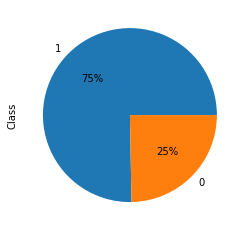

In [26]:
new_df['Class'].value_counts().plot(kind='pie', autopct='%1.0f%%')

# 去除出現次數小於5的permission欄位

In [27]:
len(class_df.columns.to_list())

878

In [28]:
class_df = new_df.groupby('Class').sum()
delete_permission = []
for col in class_df.columns:
    if class_df[col].sum() < 10:
        delete_permission.append(col)
len(delete_permission)

755

In [29]:
new_df.drop(delete_permission, axis=1, inplace=True)
new_df.groupby('Class').sum()

Permission,android.permission.ACCESS_COARSE_LOCATION,android.permission.ACCESS_COARSE_UPDATES,android.permission.ACCESS_DOWNLOAD_MANAGER,android.permission.ACCESS_FINE_LOCATION,android.permission.ACCESS_LOCATION_EXTRA_COMMANDS,android.permission.ACCESS_MOCK_LOCATION,android.permission.ACCESS_NETWORK_STATE,android.permission.ACCESS_WIFI_STATE,android.permission.ADD_SYSTEM_SERVICE,android.permission.AUTHENTICATE_ACCOUNTS,...,com.google.android.providers.gsf.permission.READ_GSERVICES,com.htc.launcher.permission.READ_SETTINGS,com.htc.launcher.permission.UPDATE_SHORTCUT,com.majeur.launcher.permission.UPDATE_BADGE,com.samsung.android.providers.context.permission.WRITE_USE_APP_FEATURE_SURVEY,com.sec.android.app.sbrowser.operatorbookmarks.permission.READ_HISTORY_BOOKMARKS,com.sec.android.provider.badge.permission.READ,com.sec.android.provider.badge.permission.WRITE,com.software.application.permission.C2D_MESSAGE,com.sonyericsson.home.permission.BROADCAST_BADGE
Class,,,,,,,,,,,,,,,,,,,,,
0,173.0,3.0,4.0,180.0,8.0,5.0,547.0,248.0,0.0,36.0,...,77.0,22.0,20.0,16.0,10.0,0.0,20.0,20.0,0.0,24.0
1,361.0,65.0,15.0,352.0,86.0,28.0,1147.0,748.0,50.0,37.0,...,3.0,7.0,0.0,0.0,0.0,27.0,0.0,0.0,164.0,0.0


In [30]:
cols = new_df.columns.to_list()[2:]

In [31]:
new_df['sum'] = new_df.sum(axis=1, numeric_only=True)
new_df.loc[new_df['sum']==0]

Permission,apk,Class,android.permission.ACCESS_COARSE_LOCATION,android.permission.ACCESS_COARSE_UPDATES,android.permission.ACCESS_DOWNLOAD_MANAGER,android.permission.ACCESS_FINE_LOCATION,android.permission.ACCESS_LOCATION_EXTRA_COMMANDS,android.permission.ACCESS_MOCK_LOCATION,android.permission.ACCESS_NETWORK_STATE,android.permission.ACCESS_WIFI_STATE,...,com.htc.launcher.permission.READ_SETTINGS,com.htc.launcher.permission.UPDATE_SHORTCUT,com.majeur.launcher.permission.UPDATE_BADGE,com.samsung.android.providers.context.permission.WRITE_USE_APP_FEATURE_SURVEY,com.sec.android.app.sbrowser.operatorbookmarks.permission.READ_HISTORY_BOOKMARKS,com.sec.android.provider.badge.permission.READ,com.sec.android.provider.badge.permission.WRITE,com.software.application.permission.C2D_MESSAGE,com.sonyericsson.home.permission.BROADCAST_BADGE,sum


In [32]:
new_df.drop(['sum'], axis=1, inplace=True)

In [33]:
new_df['apk']

0       00325582d7caaf0f36ad333869df444a1aa39326e60745...
1       00567501fe3517b1bf6b363dd6c4d0972a77c591b0d7c2...
2       00621e015191863041e78726b863b7e1374b17fda69036...
3       0149b02468a8e582d76a7ad5094c15a4a07f4f08361ba5...
4       018096f1e732c91fb315a84ab5d851430c5d2c124a7f8d...
                              ...                        
2269    ffeb97d2f85d1e30f10562c003e695f323a10f905f87c0...
2270    ffecc366e301184bb458e1375d99cd58b6d918d857a108...
2271    ffecd2343d0d4fe17071180b355e7d30744f74915ede4f...
2272    fff4c39a07f20e062231781a0d7f2e039f59286d3f5d8d...
2273    fff8e36e72ca18a049929c7f2f584f57b6fa2a03dfbe40...
Name: apk, Length: 2274, dtype: object

# 儲存處理好的資料

In [34]:
new_df.set_index('Class', inplace=True)

In [35]:
new_df.to_csv('ECT_HW8_107403020.csv')

In [36]:
df = pd.read_csv('ECT_HW8_107403020.csv')
df.head()

,Class,apk,android.permission.ACCESS_COARSE_LOCATION,android.permission.ACCESS_COARSE_UPDATES,android.permission.ACCESS_DOWNLOAD_MANAGER,android.permission.ACCESS_FINE_LOCATION,android.permission.ACCESS_LOCATION_EXTRA_COMMANDS,android.permission.ACCESS_MOCK_LOCATION,android.permission.ACCESS_NETWORK_STATE,android.permission.ACCESS_WIFI_STATE,...,com.google.android.providers.gsf.permission.READ_GSERVICES,com.htc.launcher.permission.READ_SETTINGS,com.htc.launcher.permission.UPDATE_SHORTCUT,com.majeur.launcher.permission.UPDATE_BADGE,com.samsung.android.providers.context.permission.WRITE_USE_APP_FEATURE_SURVEY,com.sec.android.app.sbrowser.operatorbookmarks.permission.READ_HISTORY_BOOKMARKS,com.sec.android.provider.badge.permission.READ,com.sec.android.provider.badge.permission.WRITE,com.software.application.permission.C2D_MESSAGE,com.sonyericsson.home.permission.BROADCAST_BADGE
0,1,00325582d7caaf0f36ad333869df444a1aa39326e60745...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,00567501fe3517b1bf6b363dd6c4d0972a77c591b0d7c2...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,00621e015191863041e78726b863b7e1374b17fda69036...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0149b02468a8e582d76a7ad5094c15a4a07f4f08361ba5...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,018096f1e732c91fb315a84ab5d851430c5d2c124a7f8d...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# APK 轉圖片

In [37]:
import os
import numpy as np
from PIL import Image

In [57]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [38]:
df.head()

,Class,apk,android.permission.ACCESS_COARSE_LOCATION,android.permission.ACCESS_COARSE_UPDATES,android.permission.ACCESS_DOWNLOAD_MANAGER,android.permission.ACCESS_FINE_LOCATION,android.permission.ACCESS_LOCATION_EXTRA_COMMANDS,android.permission.ACCESS_MOCK_LOCATION,android.permission.ACCESS_NETWORK_STATE,android.permission.ACCESS_WIFI_STATE,...,com.google.android.providers.gsf.permission.READ_GSERVICES,com.htc.launcher.permission.READ_SETTINGS,com.htc.launcher.permission.UPDATE_SHORTCUT,com.majeur.launcher.permission.UPDATE_BADGE,com.samsung.android.providers.context.permission.WRITE_USE_APP_FEATURE_SURVEY,com.sec.android.app.sbrowser.operatorbookmarks.permission.READ_HISTORY_BOOKMARKS,com.sec.android.provider.badge.permission.READ,com.sec.android.provider.badge.permission.WRITE,com.software.application.permission.C2D_MESSAGE,com.sonyericsson.home.permission.BROADCAST_BADGE
0,1,00325582d7caaf0f36ad333869df444a1aa39326e60745...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,00567501fe3517b1bf6b363dd6c4d0972a77c591b0d7c2...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,00621e015191863041e78726b863b7e1374b17fda69036...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0149b02468a8e582d76a7ad5094c15a4a07f4f08361ba5...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,018096f1e732c91fb315a84ab5d851430c5d2c124a7f8d...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
permissioin_array = df.drop(['Class', 'apk'], axis=1).to_numpy()
len(permissioin_array[0])

123

In [58]:
def apk_to_img(apk, file_name):
    apk = apk.reshape(3, 41)
    apk = np.where(apk==1, 255, 0)
#     img = Image.fromarray(apk_2D)    
    file_name = 'apk_img/' + file_name 
    plt.imsave(file_name, apk, cmap=cm.gray)
#     img.save(file_name)

In [59]:
for i in range(len(permissioin_array)):
    apk = permissioin_array[i]
    file = 'permision'+str(i)+'.png'
    apk_to_img(apk, file)

In [49]:
for i in range(len(df)):
    file_name = 'permision' + str(i) + '.png'
    df['apk'].loc[i] = file_name

C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [50]:
df_ = df[['Class', 'apk']]
df_

,Class,apk
0,1,permision0.png
1,1,permision1.png
2,1,permision2.png
3,1,permision3.png
4,1,permision4.png
...,...,...
2269,0,permision2269.png
2270,0,permision2270.png
2271,0,permision2271.png
2272,1,permision2272.png


In [51]:
df_.set_index('Class', inplace=True)
df_.to_csv('ECT_HW8_107403020_CNN.csv')